<a href="https://colab.research.google.com/github/Sulbae/ML-Supervised-Unsupervised/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Anggun-Sulis-Setyawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA

import joblib # for saving model

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [882]:
url = 'https://raw.githubusercontent.com/Sulbae/ML-Supervised-Unsupervised/refs/heads/main/bank_transactions_data_edited.csv'

raw_df = pd.read_csv(url)

In [883]:
# Menampilkan 5 baris pertama dengan function `head`
raw_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [884]:
# Menampilkan informasi dasar dari dataset dengan function `info`
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [885]:
# Menampilkan statistik deskriptif dari dataset dengan function `describe`
raw_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,2508,2484,TX000592,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountID,2516,495,AC00363,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionAmount,2511.0,NaN,NaN,NaN,297.656468,292.230367,0.26,81.31,211.36,413.105,1919.11
TransactionDate,2509,2485,2023-10-20 17:53:13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionType,2507,2,Debit,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2507,43,Fort Worth,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceID,2507,681,D000315,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IP Address,2517,591,200.136.146.93,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantID,2514,100,M026,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,2510,3,Branch,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Insight -- Pola Perilaku_: 
- `TransactionType`
    * Mayoritas nasabah merupakan pengguna kartu Debit.
- `Channel`
    * Terdapat 3 jenis channel transaksi yang dapat digunakan.

_Insight -- Karakteristik Nasabah_:
- `Location`
    * Transaksi tercatat berasal dari 43 lokasi unik di Amerika Serikat.
- `CustomerAge`
    * Rentang usia nasabah berada pada usia 18 - 80 tahun. Sementara itu, rata-rata nasabah terbanyak telah berusia 40-an tahun.
- `CustomerOccupation`
    * Dari 4 jenis profesi yang tercatat, mayoritas nasabah berstatus sebagai siswa (student).
- `AccountBalance`
    * Nominal dana nasabah berkisar antara 101,25 - 14977,99 USD.

In [886]:
# Menampilkan unique value pada kolom kategorikal
print(raw_df.TransactionType.unique())
print(raw_df.Channel.unique())
print(raw_df.CustomerOccupation.unique())
print(raw_df.Location.nunique())

['Debit' 'Credit' nan]
['ATM' 'Online' 'Branch' nan]
['Doctor' 'Student' 'Retired' 'Engineer' nan]
43


_Insight_:
* Terdeteksi nilai `nan` sebagai unique value pada kolom `TransactionType`, `Channel`, dan `CustomerOccupation`. Padahal sebelumnya tidak terhitung ketika menampilkan statistik deskriptif menggunakan fungsi `describe`.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

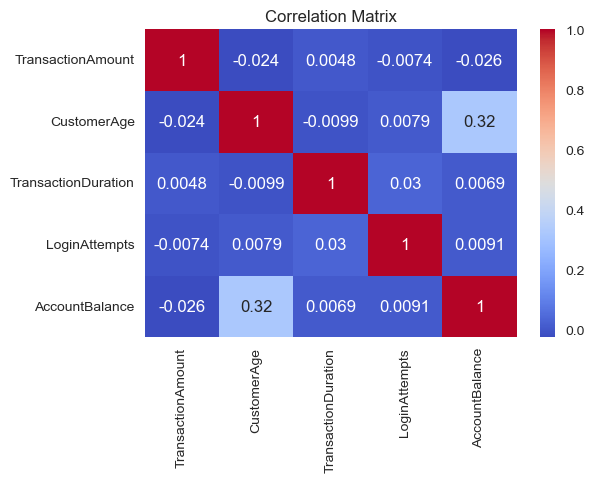

In [887]:
# Menampilkan korelasi antar fitur numerik
plt.figure(figsize=(6, 4))
sns.heatmap(raw_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

_Insight_:
* Nilai korelasi antar fitur cenderung rendah sehingga mengindikasikan multikolinearitas-nya rendah.
* Korelasi positif antara `CustomerAge` dan `AccountBalance` menunjukkan kecenderungan pelanggan dengan usia lebih tua memiliki saldo lebih besar, meskipun hubungan ini belum tentu bersifat kausal.

_Catatan_:
- Korelasi ini bisa membuat `CustomerAge` dan `AccountBalance` memiliki kontribusi mirip dalam mendefinisikan segmen. Jika keduanya terlalu berkorelasi tinggi, bisa menyebabkan redundansi fitur (informasi ganda) — yang mana justru sebaiknya dikurangi sebelum atau saat proses `feature selection`.

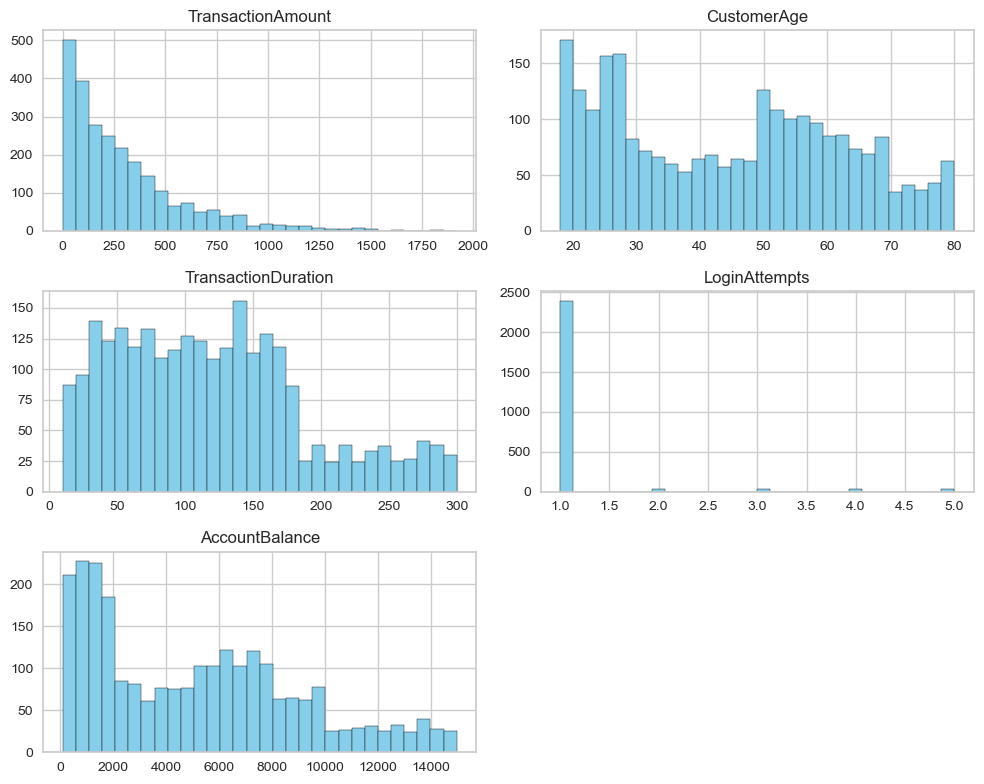

In [888]:
# Menampilkan histogram untuk semua kolom numerik 
num_cols = raw_df.select_dtypes(include=['int64', 'float64']).columns


raw_df.hist(figsize=(10, 8), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

_Insight_:
* Terdapat beberapa nilai ekstrim pada data `TransactionAmount` dan `LoginAttempts`. Kolom `LoginAttempts` memiliki variansi yang sangat kecil atau _low variance_ (hampir semua pelanggan login dalam sekali coba). Maka, fitur ini tidak perlu digunakan dalam proses clustering karena kurang informatif untuk algoritma clustering yang memperhitungkan jarak.
* Kolom `TransactionAmount` dan `AccountBalance` memiliki rentang nilai yang sangat besar dibandingkan dengan kolom numerik lainnya. Diperlukan normalisasi skala data agar setiap fitur memiliki kontribusi yang proporsional dalam proses `clustering`. 

_Catatan_:
- Tanpa normalisasi, fitur dengan rentang nilai besar akan mendominasi perhitungan jarak pada algoritma clustering seperti KMeans sehingga pengelompokkan dapat menjadi bias terhadap variabel tersebut.
- Normalisasi juga dapat membantu meningkatkan stabilitas dan konvergensi algoritma KMeans, karena centroid akan lebih mudah menemukan posisi optimal dalam ruang fitur yang sudah terstandarisasi. 

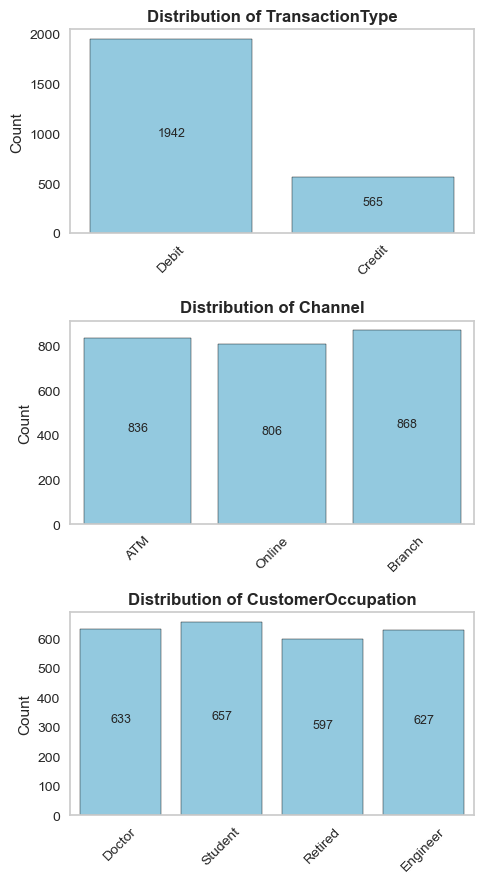

In [889]:
# Menampilkan countplot untuk semua kolom kategorikal

cat_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(5, 3 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    ax = axes[i]
    barplot = sns.countplot(data=raw_df, x=col, ax=ax, color='skyblue', edgecolor='black')
    
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%d', label_type='center', fontsize=9, padding=2)

    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(False)

plt.tight_layout()
plt.show()

_Insight_:
- `TransactionType`
    * Terdapat 2 jenis transaksi yang tercatat pada data yaitu transaksi kartu `Debit` dan `Credit`. Transaksi terbanyak yang ditemukan pada data merupakan penggunaan kartu debit.
- `Channel`
    * Terdapat 3 channel transaksi yang digunakan nasabah yaitu `ATM`, `Online`, dan `Branch`. Penggunaan ketiga channel transaksi cukup seimbang atau hampir merata. 
- `CustomerOccupation`
    * Terdapat 4 profesi yang tercatat pada data nasabah yaitu `Doctor`, `Student`, `Engineer`, dan `Retired`. Meskipun nasabah terbanyak merupakan siswa/mahasiswa, data menunjukkan distribusi yang seimbang antara keempat profesi tersebut.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

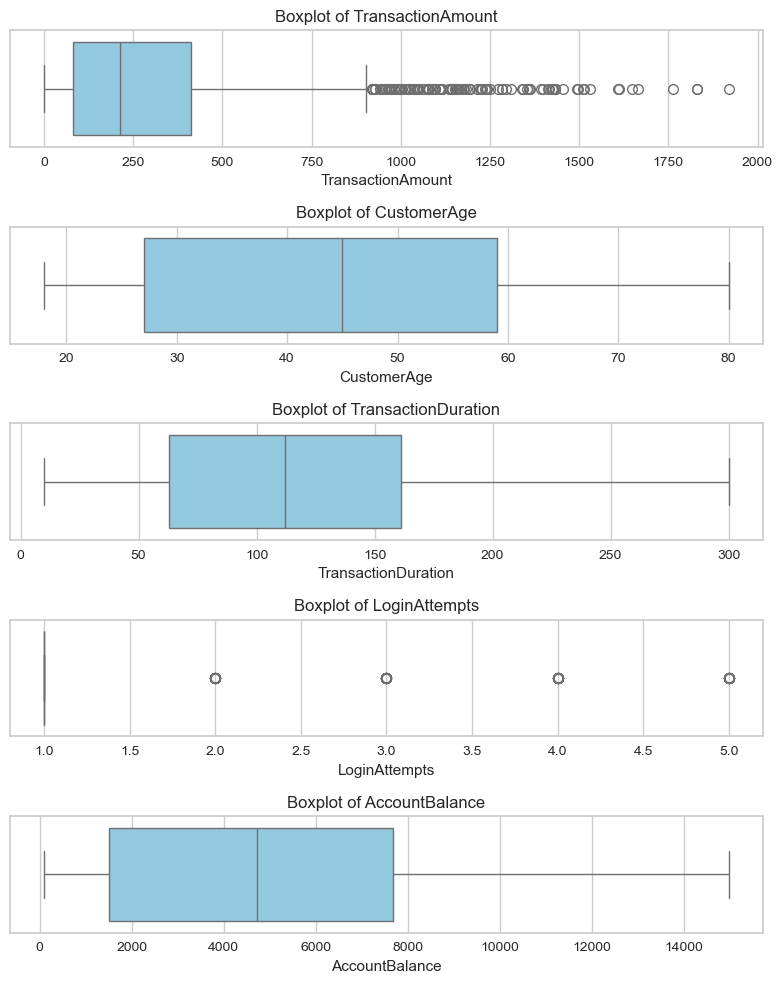

In [890]:
# Visualisasi Boxplot untuk memeriksa outlier pada fitur numerik
num_cols = raw_df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 2 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x=raw_df[col], orient='h', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

_Insight_:
* Melalui grafik boxplot, dipastikan bahwa terdapat outlier / nilai ekstrim pada data `TransactionAmount` dan `LoginAttemps`. 
* Nilai ekstrim pada data `TransactionAmount` mungkin saja dilakukan oleh nasabah yang memiliki `AccountBalance` dengan nominal tinggi. Hal ini sangat wajar. Maka, outlier akan tetap dipertimbangkan dalam pengembangan model.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [891]:
# Mengecek dataset menggunakan isnull().sum()
raw_df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

_Insight_:
* Terdapat beberapa entries yang mengandung `null`/`NaN` pada setiap kolom. Hal ini dapat disebabkan oleh kegagalan sistem dalam input data ke dalam database.
* Karena ratio `NaN` sangat kecil dibandingkan total entries pada dataset yang digunakan, maka entries dengan nilai `NaN` akan dipertimbangkan untuk dieliminasi.

In [892]:
# Mengecek dataset menggunakan duplicated().sum()
print('Jumlah duplikasi data :', raw_df.duplicated().sum())

Jumlah duplikasi data : 21


_Insight_:
* Duplikasi data yang ada selanjutnya akan dihapus.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [893]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna())
cleaned_df = raw_df.dropna().reset_index(drop=True)

cleaned_df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [894]:
# Menghapus data duplikat menggunakan drop_duplicates()
cleaned_df = cleaned_df.drop_duplicates().reset_index(drop=True)

print('Jumlah duplikasi data :', cleaned_df.duplicated().sum())

Jumlah duplikasi data : 0


In [895]:
# Melakukan drop pada kolom yang memiliki keterangan id, date, dan IP Address
selected_df = cleaned_df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'])

selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2135 non-null   float64
 1   TransactionType      2135 non-null   object 
 2   Location             2135 non-null   object 
 3   Channel              2135 non-null   object 
 4   CustomerAge          2135 non-null   float64
 5   CustomerOccupation   2135 non-null   object 
 6   TransactionDuration  2135 non-null   float64
 7   LoginAttempts        2135 non-null   float64
 8   AccountBalance       2135 non-null   float64
dtypes: float64(5), object(4)
memory usage: 150.2+ KB


In [896]:
# Seleksi fitur yang menggambarkan pola perilaku transaksi pelanggan
selected_df = selected_df.drop(columns=['Location', 'LoginAttempts'])

selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2135 non-null   float64
 1   TransactionType      2135 non-null   object 
 2   Channel              2135 non-null   object 
 3   CustomerAge          2135 non-null   float64
 4   CustomerOccupation   2135 non-null   object 
 5   TransactionDuration  2135 non-null   float64
 6   AccountBalance       2135 non-null   float64
dtypes: float64(4), object(3)
memory usage: 116.9+ KB


In [897]:
# Cek distribusi fitur yang skew ekstrim
selected_df.select_dtypes(include=np.number).skew().sort_values(ascending=False)

TransactionAmount      1.719725
AccountBalance         0.612371
TransactionDuration    0.593971
CustomerAge            0.154991
dtype: float64

In [898]:
# Log Transform kolom numerik yang skew agar model lebih robust
selected_df['TransactionAmount'] = np.log1p(selected_df['TransactionAmount'])

In [899]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menggunakan IQR untuk mendeteksi dan mengganti outlier dengan nilai batas atas atau batas bawah
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mengganti outlier dengan batas bawah atau batas atas
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])
    return dataframe

selected_df = handle_outliers_iqr(selected_df, selected_df.select_dtypes(include=[np.number]).columns)

selected_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2135.0,5.161398,1.181308,2.033688,4.431352,5.367517,6.029795,7.513174
CustomerAge,2135.0,44.622951,17.835201,18.000000,27.000000,45.000000,59.000000,80.000000
TransactionDuration,2135.0,120.152693,70.862964,10.000000,63.000000,113.000000,162.000000,300.000000
AccountBalance,2135.0,5093.583789,3919.681355,102.200000,1482.350000,4638.370000,7696.920000,14977.990000


In [900]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(selected_df.select_dtypes(include=[np.number]))
scaled_df = pd.DataFrame(
    scaled_features, 
    columns=selected_df.select_dtypes(include=[np.number]).columns,
    index=selected_df.index
)

normalized_df = selected_df.copy()
normalized_df .update(scaled_df)

normalized_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,0.124162,Debit,ATM,0.838710,Doctor,0.244828,0.336790
1,0.711598,Debit,ATM,0.806452,Doctor,0.451724,0.918049
2,0.513329,Debit,Online,0.016129,Student,0.158621,0.068578
3,0.582056,Debit,Online,0.129032,Student,0.051724,0.569170
4,0.456343,Debit,ATM,0.000000,Student,0.558621,0.045677


In [901]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoded_df = normalized_df.copy()

cat_cols = encoded_df.select_dtypes(include=['object']).columns

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].copy())
    encoders[col] = le # Menyimpan encoder untuk setiap kolom kategorikal

encoded_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,0.124162,1,0,0.838710,0,0.244828,0.336790
1,0.711598,1,0,0.806452,0,0.451724,0.918049
2,0.513329,1,2,0.016129,3,0.158621,0.068578
3,0.582056,1,2,0.129032,3,0.051724,0.569170
4,0.456343,1,0,0.000000,3,0.558621,0.045677


In [902]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

encoded_df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'AccountBalance']

In [903]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2135 non-null   float64
 1   TransactionType      2135 non-null   int32  
 2   Channel              2135 non-null   int32  
 3   CustomerAge          2135 non-null   float64
 4   CustomerOccupation   2135 non-null   int32  
 5   TransactionDuration  2135 non-null   float64
 6   AccountBalance       2135 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 91.9 KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [904]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

preprocessed_df = encoded_df.copy()

# Binning pada fitur 'TransactionAmount'
# amount_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
# amount_labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
# encoded_df['TransactionAmountBinned'] = pd.cut(encoded_df['TransactionAmount'], bins=amount_bins, labels=amount_labels)
# encoded_df['TransactionAmountBinned'] = le.fit_transform(encoded_df['TransactionAmountBinned'])

# Binning pada fitur 'AccountBalance'
# balance_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
# balance_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# encoded_df['AccountBalanceBinned'] = pd.cut(encoded_df['AccountBalance'], bins=balance_bins, labels=balance_labels)
# encoded_df['AccountBalanceBinned'] = le.fit_transform(encoded_df['AccountBalanceBinned'])

# Binning pada fitur 'CustomerAge'
age_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
age_labels = ['Very Young', 'Young', 'Middle Aged', 'Old', 'Very Old']
preprocessed_df['CustomerAgeBinned'] = pd.cut(preprocessed_df['CustomerAge'], bins=age_bins, labels=age_labels)
preprocessed_df['CustomerAgeBinned'] = le.fit_transform(preprocessed_df['CustomerAgeBinned'])

preprocessed_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,CustomerAgeBinned
0,0.124162,1,0,0.838710,0,0.244828,0.336790,2
1,0.711598,1,0,0.806452,0,0.451724,0.918049,2
2,0.513329,1,2,0.016129,3,0.158621,0.068578,3
3,0.582056,1,2,0.129032,3,0.051724,0.569170,3
4,0.456343,1,0,0.000000,3,0.558621,0.045677,5


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [905]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

preprocessed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2135.0,0.570803,0.215587,0.0,0.437571,0.608420,0.729285,1.0
TransactionType,2135.0,0.773302,0.418794,0.0,1.000000,1.000000,1.000000,1.0
Channel,2135.0,0.978923,0.807083,0.0,0.000000,1.000000,2.000000,2.0
CustomerAge,2135.0,0.429402,0.287665,0.0,0.145161,0.435484,0.661290,1.0
CustomerOccupation,2135.0,1.503044,1.135961,0.0,0.000000,1.000000,3.000000,3.0
TransactionDuration,2135.0,0.379837,0.244355,0.0,0.182759,0.355172,0.524138,1.0
AccountBalance,2135.0,0.335537,0.263494,0.0,0.092778,0.304936,0.510542,1.0
CustomerAgeBinned,2135.0,2.053396,1.457282,0.0,1.000000,2.000000,3.000000,5.0


In [906]:
modeling_df = preprocessed_df.drop(columns=[
    # 'TransactionAmount', 
    # 'AccountBalance',
    'CustomerAge'
    ]
)

modeling_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2135.0,0.570803,0.215587,0.0,0.437571,0.608420,0.729285,1.0
TransactionType,2135.0,0.773302,0.418794,0.0,1.000000,1.000000,1.000000,1.0
Channel,2135.0,0.978923,0.807083,0.0,0.000000,1.000000,2.000000,2.0
CustomerOccupation,2135.0,1.503044,1.135961,0.0,0.000000,1.000000,3.000000,3.0
TransactionDuration,2135.0,0.379837,0.244355,0.0,0.182759,0.355172,0.524138,1.0
AccountBalance,2135.0,0.335537,0.263494,0.0,0.092778,0.304936,0.510542,1.0
CustomerAgeBinned,2135.0,2.053396,1.457282,0.0,1.000000,2.000000,3.000000,5.0


,estimator,KMeans(n_clus...ndom_state=42)
,ax,<Axes: >
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,False
,locate_elbow,True
,n_clusters,9
,init,'k-means++'
,n_init,'auto'
,max_iter,300


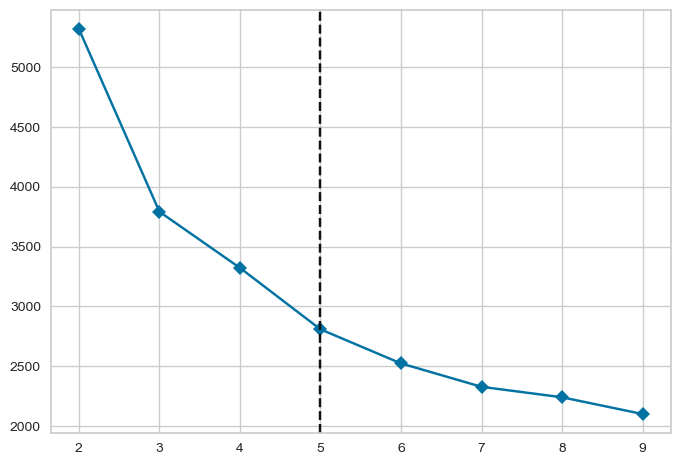

In [907]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(modeling_df)

_Insight_:
* Berdasarkan grafik, Elbow terlihat pada nilai k = 5 sehingga jumlah cluster optimalnyna sebanyak 5.

In [908]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
modeling_df['KMeans_Cluster'] = kmeans.fit_predict(modeling_df)

clustered_df = encoded_df.copy()

clustered_df['KMeans_Cluster'] = kmeans.labels_

clustered_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,0.124162,1,0,0.838710,0,0.244828,0.336790,3
1,0.711598,1,0,0.806452,0,0.451724,0.918049,3
2,0.513329,1,2,0.016129,3,0.158621,0.068578,4
3,0.582056,1,2,0.129032,3,0.051724,0.569170,4
4,0.456343,1,0,0.000000,3,0.558621,0.045677,4


In [909]:
clustered_df['KMeans_Cluster'].unique()

array([3, 4, 1, 2, 0])

Jalankan cell code ini untuk menyimpan model kamu.

In [910]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

c:\Users\ACER\.conda\envs\ML-Pemula-Dicoding-2025\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


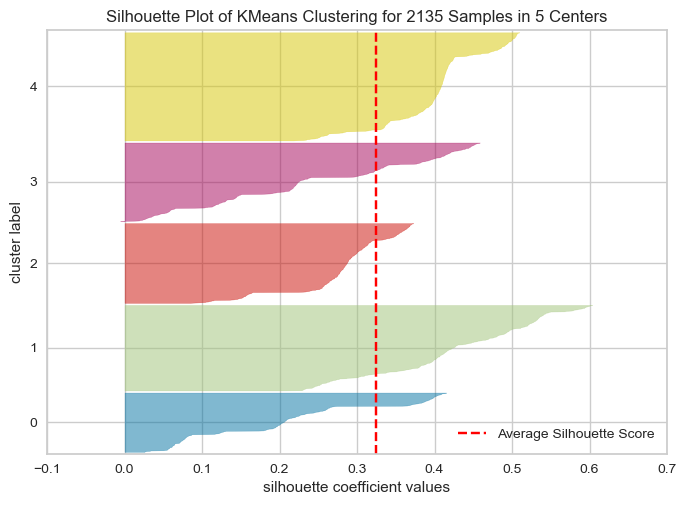

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2135 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [911]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_viz = SilhouetteVisualizer(kmeans, colors='yellowbrick')
silhouette_viz.fit(modeling_df.drop(columns=['KMeans_Cluster']))
silhouette_viz.show()

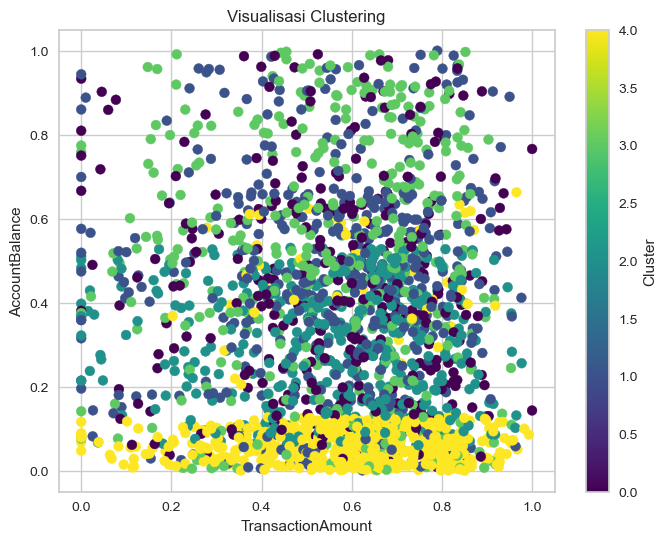

In [912]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(clustered_df['TransactionAmount'], clustered_df['AccountBalance'], 
            c=clustered_df['KMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.title('Visualisasi Clustering')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [913]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
pca_components = pca.fit_transform(modeling_df.drop(columns=['KMeans_Cluster']))

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(pca_df)

pca_clustered_df = encoded_df.copy()
pca_clustered_df['KMeans_Cluster'] = kmeans_pca.labels_

pca_clustered_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,0.124162,1,0,0.838710,0,0.244828,0.336790,3
1,0.711598,1,0,0.806452,0,0.451724,0.918049,3
2,0.513329,1,2,0.016129,3,0.158621,0.068578,2
3,0.582056,1,2,0.129032,3,0.051724,0.569170,2
4,0.456343,1,0,0.000000,3,0.558621,0.045677,2


In [914]:
pca_clustered_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,0.124162,1,0,0.838710,0,0.244828,0.336790,3
1,0.711598,1,0,0.806452,0,0.451724,0.918049,3
2,0.513329,1,2,0.016129,3,0.158621,0.068578,2
3,0.582056,1,2,0.129032,3,0.051724,0.569170,2
4,0.456343,1,0,0.000000,3,0.558621,0.045677,2


c:\Users\ACER\.conda\envs\ML-Pemula-Dicoding-2025\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


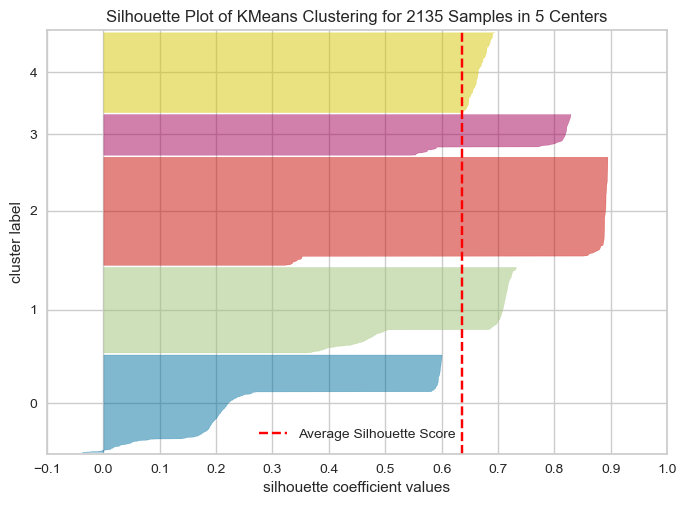

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2135 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [915]:
# Visualisasi silhoutte skor hasil clustering pada data PCA
pca_df['KMeans_Cluster'] = kmeans_pca.labels_

silhouette_viz_pca = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick')
silhouette_viz_pca.fit(pca_df.drop(columns=['KMeans_Cluster']))
silhouette_viz_pca.show()

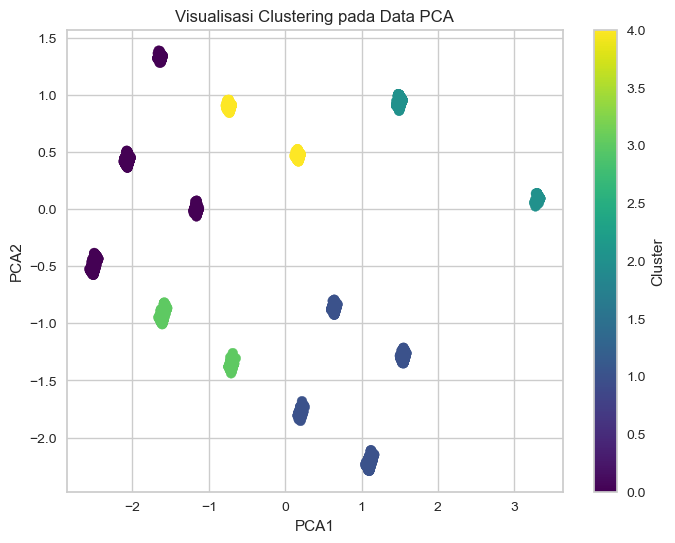

In [916]:
# Visualisasi hasil clustering pada data PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], 
            c=pca_df['KMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualisasi Clustering pada Data PCA')
plt.colorbar(label='Cluster')

plt.show()

In [917]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA

joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [918]:
# Menampilkan data hasil clustering
pca_clustered_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,0.124162,1,0,0.838710,0,0.244828,0.336790,3
1,0.711598,1,0,0.806452,0,0.451724,0.918049,3
2,0.513329,1,2,0.016129,3,0.158621,0.068578,2
3,0.582056,1,2,0.129032,3,0.051724,0.569170,2
4,0.456343,1,0,0.000000,3,0.558621,0.045677,2


In [921]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

numeric_data = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

analisis_desc_num = pca_clustered_df.groupby('KMeans_Cluster')[numeric_data].agg(
    ['mean', 'min', 'max', 
     lambda x: x.quantile(0.25),
     lambda x: x.quantile(0.5),
     lambda x: x.quantile(0.75)]
)

analisis_desc_num.columns = analisis_desc_num.columns.set_levels(
    ['mean', 'min', 'max', 'Q1', 'Q2', 'Q3'], level=1
)

analisis_desc_num.T

KMeans_Cluster                   0         1         2         3         4
TransactionAmount   mean  0.562685  0.562889  0.586300  0.574440  0.566343
                    min   0.000000  0.000000  0.000000  0.000000  0.000000
                    max   0.999898  0.976259  0.993021  1.000000  0.976805
                    Q1    0.433320  0.432330  0.453837  0.441787  0.430739
                    Q2    0.600920  0.596953  0.615108  0.612828  0.608633
                    Q3    0.723368  0.724612  0.737879  0.728145  0.712751
CustomerAge         mean  0.532098  0.260571  0.081479  0.725806  0.805595
                    min   0.403226  0.129032  0.000000  0.612903  0.612903
                    max   0.677419  0.387097  0.161290  0.838710  1.000000
                    Q1    0.467742  0.193548  0.032258  0.661290  0.709677
                    Q2    0.532258  0.258065  0.080645  0.725806  0.806452
                    Q3    0.580645  0.322581  0.129032  0.790323  0.919355
TransactionDuration mean  0.393342  0.376281  0.382771  0.361301  0.372647
                    min   0.000000  0.000000  0.003448  0.000000  0.006897
                    max   1.000000  1.000000  0.996552  0.996552  0.986207
                    Q1    0.193103  0.155172  0.182759  0.179310  0.186207
                    Q2    0.372414  0.348276  0.362069  0.334483  0.341379
                    Q3    0.548276  0.520690  0.527586  0.505172  0.512931
AccountBalance      mean  0.401235  0.461197  0.094249  0.627019  0.299039
                    min   0.002269  0.000710  0.000000  0.001256  0.060765
                    max   0.997633  1.000000  0.662902  0.995087  0.530695
                    Q1    0.201626  0.290832  0.032164  0.473111  0.176569
                    Q2    0.393989  0.456675  0.064518  0.697894  0.292645
                    Q3    0.561724  0.625900  0.100543  0.842658  0.417694

C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\3378888400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\3378888400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\3378888400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palet

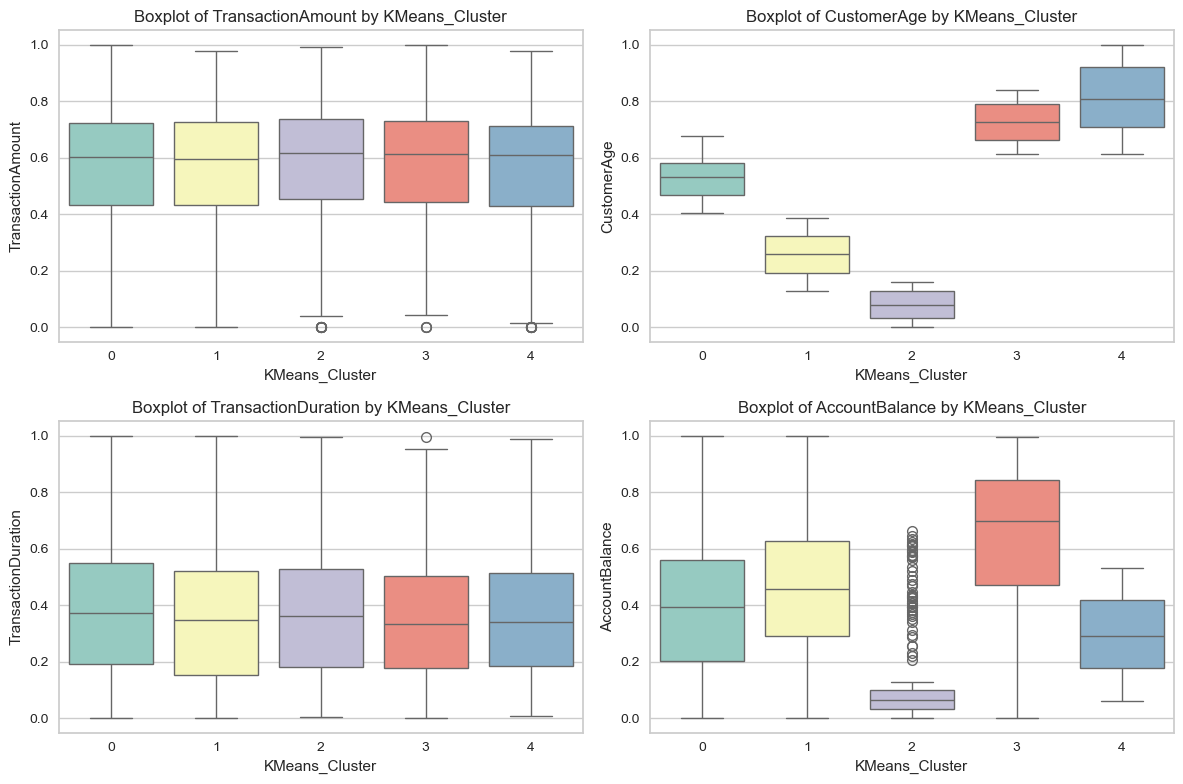

In [ ]:
# Visualisasi data sebelum inverse

# Tentukan total subplot dan ukuran grid
tot_plots = len(numeric_data)
n_cols = 2
n_rows = (tot_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numeric_data):
    ax = axes[i]
    if col in numeric_data:
        sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
        ax.set_title(f'Boxplot of {col} by KMeans_Cluster')

plt.tight_layout()
plt.show()

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0:**
  - **Rata-rata (mean) TransactionAmount:** 0.562685
  - **Rata-rata (mean) AccountBalance:** 0.401235
  - **Maksimum CustomerAge:** 0.677419
  - **Minimum CustomerAge:** 0.403226
  - **Analisis:** Cluster ini mencakup pelanggan dengan transaksi rata-rata sedang dan berdasarkan jumlah simpanannya kemungkinan merupakan kaum berpendapatan menengah yang terdiri dari kelompok rentang usia dewasa (_middle age_).
2. **Cluster 1:**
  - **Rata-rata (mean) TransactionAmount:** 0.562889
  - **Rata-rata (mean) AccountBalance:** 0.461197
  - **Maksimum CustomerAge:** 0.387097
  - **Minimum CustomerAge:** 0.129032
  - **Analisis:** Cluster ini mencakup pelanggan dengan transaksi rata-rata sedang dan berdasarkan jumlah simpanannya kemungkinan merupakan kaum berpendapatan menengah yang terdiri dari kelompok rentang usia muda (_young_).
3. **Cluster 2:**
  - **Rata-rata (mean) TransactionAmount:** 0.586300
  - **Rata-rata (mean) AccountBalance:** 0.094249
  - **Maksimum CustomerAge:** 0.161290
  - **Minimum CustomerAge:** 0.000000
  - **Analisis:** Cluster ini mencakup pelanggan dengan transaksi rata-rata sedang dan berdasarkan jumlah simpanannya kemungkinan merupakan kaum berpendapatan rendah yang terdiri dari kelompok rentang usia remaja (_very young/teen_).
4. **Cluster 3:**
  - **Rata-rata (mean) TransactionAmount:** 0.574440
  - **Rata-rata (mean) AccountBalance:** 0.627019
  - **Maksimum CustomerAge:** 0.838710
  - **Minimum CustomerAge:** 0.612903
  - **Analisis:** Cluster ini mencakup pelanggan dengan transaksi rata-rata sedang dan berdasarkan jumlah simpanannya kemungkinan merupakan kaum berpendapatan tinggi yang terdiri dari kelompok rentang usia tua (_senior_).
5. **Cluster 4:**
  - **Rata-rata (mean) TransactionAmount:** 0.566343
  - **Rata-rata (mean) AccountBalance:** 0.2999039
  - **Maksimum CustomerAge:** 0.1
  - **Minimum CustomerAge:** 0.612903
  - **Analisis:** Cluster ini mencakup pelanggan dengan transaksi rata-rata sedang dan berdasarkan jumlah simpanannya kemungkinan merupakan kelompok berpendapatan menengah bawah yang terdiri dari kelompok rentang usia tua (_senior_).

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [924]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

data_clustering = pca_clustered_df.rename(columns={'KMeans_Cluster': 'Target'})

In [925]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

data_clustering.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [926]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

# Inverse transform data numerik yang sudah di-scaling

pca_clustered_df[numeric_data] = scaler.inverse_transform(pca_clustered_df[numeric_data])

pca_clustered_df['TransactionAmount'] = np.expm1(pca_clustered_df['TransactionAmount'])

pca_clustered_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,14.09,1,0,70.0,0,81.0,5112.21,3
1,376.24,1,0,68.0,0,141.0,13758.91,3
2,126.29,1,2,19.0,3,56.0,1122.35,2
3,184.50,1,2,26.0,3,25.0,8569.06,2
4,92.15,1,0,18.0,3,172.0,781.68,2


In [930]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

category_data = ['TransactionType', 'Channel', 'CustomerOccupation']

for col in category_data:
    le = encoders[col]
    pca_clustered_df[col] = le.inverse_transform(pca_clustered_df[col].astype(int))

# tampilkan dataset yang sudah di-inverse
original_df = pca_clustered_df.copy()
original_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,KMeans_Cluster
0,14.09,Debit,ATM,70.0,Middle Aged,81.0,5112.21,3
1,376.24,Debit,ATM,68.0,Middle Aged,141.0,13758.91,3
2,126.29,Debit,Online,19.0,Very Young,56.0,1122.35,2
3,184.50,Debit,Online,26.0,Very Young,25.0,8569.06,2
4,92.15,Debit,ATM,18.0,Very Young,172.0,781.68,2


In [931]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

analisis_desc_num = original_df.groupby('KMeans_Cluster')[numeric_data].agg(
    ['mean', 'min', 'max', 
     lambda x: x.quantile(0.25),
     lambda x: x.quantile(0.5),
     lambda x: x.quantile(0.75)]
)

analisis_desc_num.columns = analisis_desc_num.columns.set_levels(
    ['mean', 'min', 'max', 'Q1', 'Q2', 'Q3'], level=1
)

analisis_desc_num.T

KMeans_Cluster                       0             1            2  \
TransactionAmount   mean    283.442348    285.477915   320.046360   
                    min       6.642217      6.642217     6.642217   
                    max    1830.000000   1607.550000  1762.280000   
                    Q1       81.110000     80.667500    90.880000   
                    Q2      204.700000    200.280000   221.330000   
                    Q3      401.370000    404.122500   434.670000   
CustomerAge         mean     50.990099     34.155405    23.051693   
                    min      43.000000     26.000000    18.000000   
                    max      60.000000     42.000000    28.000000   
                    Q1       47.000000     30.000000    20.000000   
                    Q2       51.000000     34.000000    23.000000   
                    Q3       54.000000     38.000000    26.000000   
TransactionDuration mean    124.069307    119.121622   121.003565   
                    min      10.000000     10.000000    11.000000   
                    max     300.000000    300.000000   299.000000   
                    Q1       66.000000     55.000000    63.000000   
                    Q2      118.000000    111.000000   115.000000   
                    Q3      169.000000    161.000000   163.000000   
AccountBalance      mean   6070.891347   6962.871689  1504.231729   
                    min     135.960000    112.760000   102.200000   
                    max   14942.780000  14977.990000  9963.390000   
                    Q1     3101.540000   4428.555000   580.660000   
                    Q2     5963.100000   6895.600000  1061.960000   
                    Q3     8458.290000   9412.957500  1597.850000   

KMeans_Cluster                       3            4  
TransactionAmount   mean    306.303965   295.840502  
                    min       6.642217     6.642217  
                    max    1831.020000  1612.370000  
                    Q1       85.010000    79.957500  
                    Q2      218.570000   213.580000  
                    Q3      412.050000   378.630000  
CustomerAge         mean     63.000000    67.946860  
                    min      56.000000    56.000000  
                    max      70.000000    80.000000  
                    Q1       59.000000    62.000000  
                    Q2       63.000000    68.000000  
                    Q3       67.000000    75.000000  
TransactionDuration mean    114.777251   118.067633  
                    min      10.000000    12.000000  
                    max     299.000000   296.000000  
                    Q1       62.000000    64.000000  
                    Q2      107.000000   109.000000  
                    Q3      156.500000   158.750000  
AccountBalance      mean   9429.600569  4550.643744  
                    min     120.890000  1006.120000  
                    max   14904.900000  7996.700000  
                    Q1     7140.095000  2728.802500  
                    Q2    10483.930000  4455.525000  
                    Q3    12637.405000  6315.722500

In [932]:
analisis_desc_cat = original_df.groupby('KMeans_Cluster')[category_data].agg(lambda x: x.mode()[0]).T
analisis_desc_cat

KMeans_Cluster,0,1,2,3,4
TransactionType,Debit,Debit,Debit,Debit,Debit
Channel,ATM,Branch,Branch,ATM,ATM
CustomerOccupation,Old,Old,Very Young,Middle Aged,Very Old


C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\2738354591.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\2738354591.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
C:\Users\ACER\AppData\Local\Temp\ipykernel_52244\2738354591.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palet

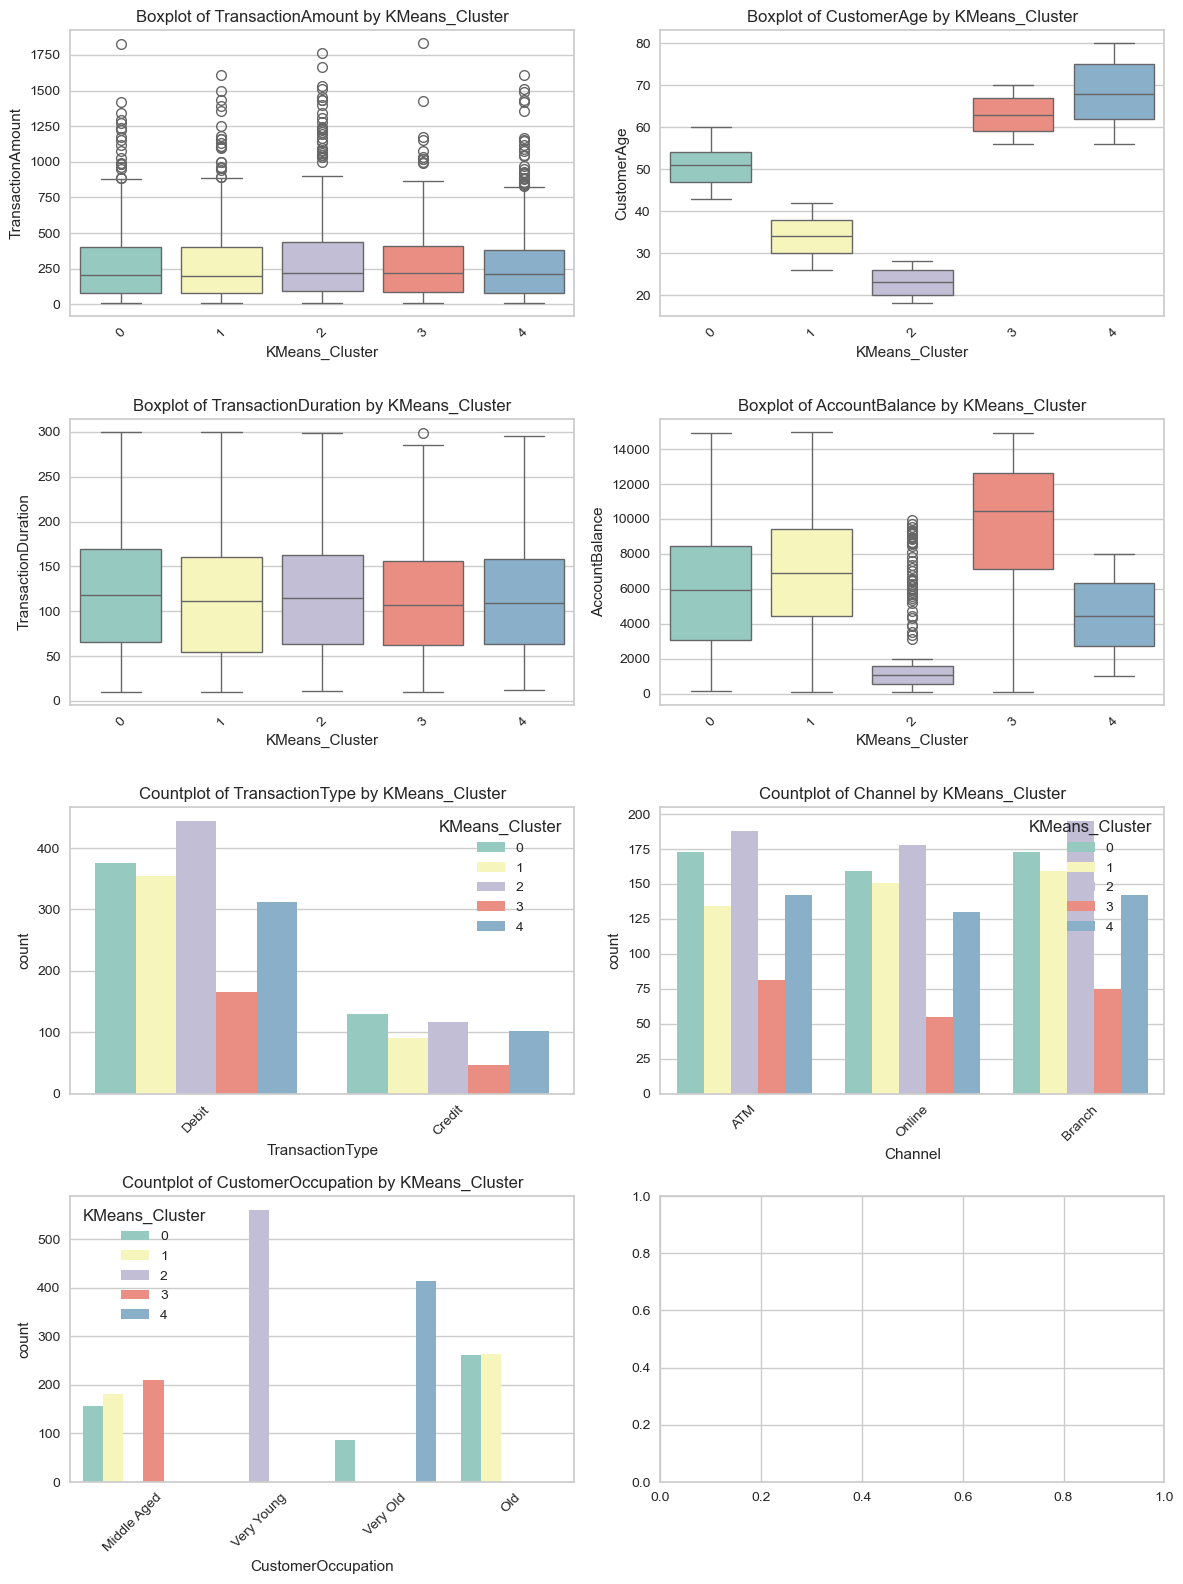

In [935]:
# Visualisasi data setelah inverse

# Tentukan total subplot dan ukuran grid
tot_plots = len(numeric_data) + len(category_data)
n_cols = 2
n_rows = (tot_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numeric_data + category_data):
    ax = axes[i]
    if col in numeric_data:
        sns.boxplot(x='KMeans_Cluster', y=col, data=pca_clustered_df, ax=ax, palette='Set3')
        ax.set_title(f'Boxplot of {col} by KMeans_Cluster')
    else:
        sns.countplot(x=col, hue='KMeans_Cluster', data=pca_clustered_df, ax=ax, palette='Set3')
        ax.set_title(f'Countplot of {col} by KMeans_Cluster')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Gunakan merge atau concat untuk menggabungkan data.
# Pastikan data yang digabungkan adalah data yang sudah di-inverse.
# ___ = pd.merge(___, ___, on=<key>, how='inner')

In [ ]:
# Simpan Data
data_clustering_inverse = original_df.rename(columns={'KMeans_Cluster': 'Target'})

data_clustering_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.